In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from tkinter import *
from math import *
import random

objectx=[]
objecty=[]


NUMNUM=300
numberline=NUMNUM
numberpoint=NUMNUM

pix=5

xx0=-pix
yy0=-pix
xxe=pix
yye=pix

dx=(xxe-xx0)/numberline
dy=(yye-yy0)/numberpoint

for ln in range(numberline):
    for point in range(numberpoint):
        objectx.append((ln*dx+xx0))
        objecty.append((point*dy+yy0))

# for ln in range(numberline):
#         objectx.append((ln*dx+xx0))
#         objecty.append((ln*dy+yy0))

#-------double lense------#

lensposx=[0.920, -0.920]
lensposy=[0.0001, 0.0001]
m=[0.2, 2, 1]
#--------********---------#

#-------single lense------#

# lensposx=[0.001]
# lensposy=[0]
# m=[1]
   
#--------********---------#


#---------------------------------------------------------Calculation angle of deflaction----------------------------------------------#


def mvec(x, y):                       #modul of vector  
    return (x**2 + y**2)**0.5   

def theta(m, p):                      #function of deflection angle
    return m/(p)


vsumx=0.0
vsumy=0.0


vecsumx=[]
vecsumy=[]

for objects in range(len(objectx)):
    for lens in range(len(lensposx)):

        vecx=(lensposx[lens]-objectx[objects])/mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects]))*theta(m[lens], mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects])))
        vecy=(lensposy[lens]-objecty[objects])/mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects]))*theta(m[lens], mvec((lensposx[lens]-objectx[objects]),(lensposy[lens]-objecty[objects])))

        vsumx=vsumx+vecx
        vsumy=vsumy+vecy

        
    vecsumx.append(vsumx+objectx[objects])
    vecsumy.append(vsumy+objecty[objects])
    #print(vsumx+objectx[objects], vsumy+objecty[objects])
    
    vsumx=0.0
    vsumy=0.0
    
#---------------------------------------------------------*********************************---------------------------------------------#


(array([682., 512., 391., 337., 287., 231., 185., 193., 140., 120., 115.,
         81.,  71.,  45.,  60.,  52.,  37.,  42.,  32.,  37.,  26.,  18.,
         21.,  28.,  22.,  22.,  10.,  22.,  12.,  10.,  10.,  13.,   8.,
          7.,   8.,   6.,   7.,   5.,   3.,   6.,   3.,   3.,   5.,   3.,
          3.,   6.,   1.,   4.,   2.,   1.,   1.,   3.,   2.,   1.,   3.,
          2.,   1.,   3.,   3.,   2.,   0.,   0.,   3.,   0.,   0.,   0.,
          1.,   3.,   1.,   2.,   2.,   1.,   3.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

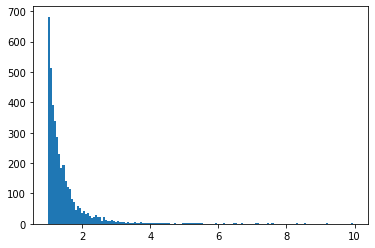

In [2]:
lensposx=[]
lensposy=[]
m=[]
power=-4.1
min_mass=1
max_mass=10
for l in range(4000):
    mm=random.random()
    m.append((mm*(max_mass**(1+power)-min_mass**(1+power))+min_mass**(1+power))**(1/(1+power)))
plt.hist(m, bins=150)
        

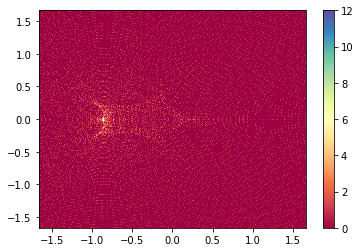

In [3]:
N_bins = 380

pixh=pix/3
x=vecsumx
y=vecsumy
#plt.figure(figsize=(7, 5))

#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='hot')
plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='Spectral')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=False, cmap='coolwarm')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='rainbow')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]], normed=False, cmap='plasma')
cb = plt.colorbar()
#cb.set_label('Number of entries')


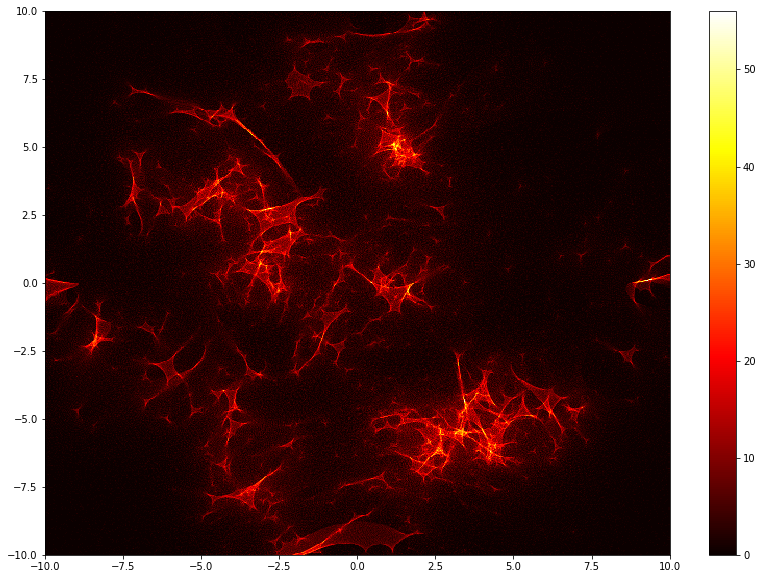

In [4]:
fil = open('INPUT')
lc = fil.readlines()
xx = []
yy= []


count=0
for l in lc:
    s = l.split()
    xx.append(float(s[0]))
    yy.append(float(s[1]))
    
    
N_bins = 600
pix=10
pixh=pix/1
x=xx
y=yy
plt.figure(figsize=(14, 10))

plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='hot')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=True, cmap='Spectral')
cb = plt.colorbar()
#     xl.append(int(s[5])/1000*PIXMAX0+X_POS)
#     yl.append(int(s[6])/1000*PIXMAX0+Y_POS)
# m=[]
# fil2 = open('lenspos')
# lc2 = fil2.readlines()
# for l in lc2:
#     s = l.split()
#     m.append(float(s[2]))

# plt.hist(m, bins=150)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import *
import random

objectx=[]
objecty=[]


NUMNUM=1000
numberline=NUMNUM
numberpoint=NUMNUM

pix=25

xx0=-pix
yy0=-pix
xxe=pix
yye=pix

dx=(xxe-xx0)/numberline
dy=(yye-yy0)/numberpoint

#-------double lense------#

# lensposx=[0.920, -0.920]
# lensposy=[0.0001, 0.0001]
# m=[0.2, 2, 1]

# for i in range(30):
#     lensposx.append(random.uniform(-10, 10))
#     lensposy.append(random.uniform(-10, 10))
#     m.append(random.uniform(0.01, 5))

# print(m)


lensposx=[]
lensposy=[]
m=[]
power=-1.3
min_mass=0.1
max_mass=2
for l in range(1000):
    lensposx.append(random.uniform(-pix, pix))
    lensposy.append(random.uniform(-pix, pix))
    mm=random.random()
    m.append((mm*(max_mass**(1+power)-min_mass**(1+power))+min_mass**(1+power))**(1/(1+power)))


# fil = open('lens_position_147.dat')
# lc = fil.readlines()
# count=0
# for l in lc:
#     s = l.split()
#     lensposx.append(float(s[1]))
#     lensposy.append(float(s[2]))
#     m.append(float(s[3]))
#---------------------------------------------------------Calculation angle of deflaction----------------------------------------------#


def mvec(x, y):                       #modul of vector  
    return (x**2 + y**2)**0.5   

def theta(m, p):                      #function of deflection angle
    return m/(p)


vsumx=0.0
vsumy=0.0


vecsumx=[]
vecsumy=[]

for i in range(numberline):
    for j in range(numberpoint):
        objecty=j*dy+yy0
        objectx=i*dx+xx0
        
        for lens in range(len(lensposx)):
            modvec=mvec((lensposx[lens]-objectx),(lensposy[lens]-objecty))
            th=theta(m[lens], modvec)
            vecx=(lensposx[lens]-objectx)/modvec*th
            vecy=(lensposy[lens]-objecty)/modvec*th
            
            vsumx=vsumx+vecx
            vsumy=vsumy+vecy

        vecsumx.append(vsumx+objectx)
        vecsumy.append(vsumy+objecty)
        
        vsumx=0.0
        vsumy=0.0
    

KeyboardInterrupt: 

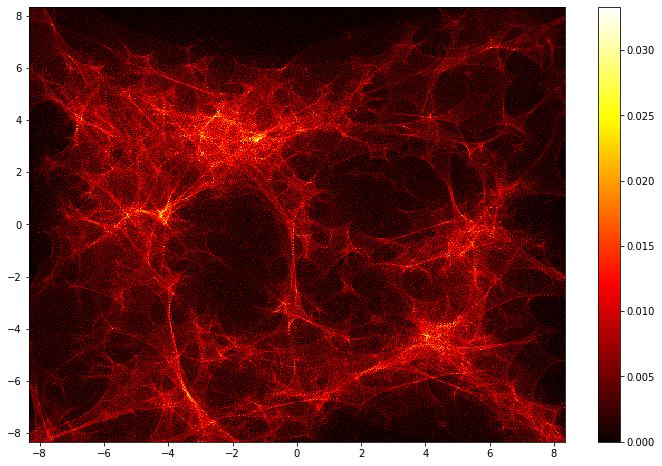

In [94]:
N_bins = 480

pixh=pix/3.0
x=vecsumx
y=vecsumy
plt.figure(figsize=(12, 8))

plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=True, cmap='hot')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='Spectral')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='jet')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , density=False, cmap='gnuplot')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=False, cmap='coolwarm')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]] , normed=True, cmap='rainbow')
#plt.hist2d(x, y, bins=N_bins, range=[[-pixh, pixh], [-pixh, pixh]], normed=False, cmap='plasma')
cb = plt.colorbar()
#cb.set_label('Number of entries')


In [4]:
lensposx=[]
lensposy=[]
mm=[]
power=-2
min_mass=0.01
for l in range(8):
        #m=(random.uniform(0.01, 5))
        #mm.append(min_mass(m+1)**(1/1+power))
        


SyntaxError: unexpected EOF while parsing (<ipython-input-4-9b4576ddde61>, line 9)

(array([ 6.,  3.,  4.,  1.,  3., 11.,  7., 15.,  5., 10.,  8.,  8.,  4.,
         8.,  9.,  6.,  4.,  8.,  5.,  7.,  6.,  7.,  7.,  8., 11.,  7.,
         6.,  5.,  6.,  4.,  7.,  4.,  7.,  6.,  4.,  5.,  6.,  6.,  6.,
         7., 11.,  6.,  8.,  7.,  5.,  5.,  6.,  5.,  8.,  9.,  6.,  5.,
         7.,  3.,  5.,  1.,  6., 10.,  4.,  2.,  6.,  2.,  7.,  1.,  9.,
         4.,  1.,  9.,  4.,  5.,  3., 10., 10.,  6.,  5.,  4.,  5.,  9.,
        11.,  8.,  8.,  6.,  9.,  7., 11.,  5.,  9.,  7.,  5.,  7.,  2.,
        10.,  3.,  4.,  4.,  5.,  6., 11., 10.,  6.,  6.,  9.,  7.,  8.,
         5.,  3.,  2.,  6.,  6.,  9., 11.,  7.,  9.,  6.,  7., 10.,  7.,
        11.,  5.,  3., 10., 11.,  8.,  5.,  9.,  4.,  7., 11.,  8.,  7.,
         7.,  5.,  5., 10.,  7.,  6.,  8.,  9., 17., 15.,  7., 10.,  4.,
         4.,  4., 10.,  5.,  7.,  5.,  9.]),
 array([4.05590000e-04, 7.06950987e-03, 1.37334297e-02, 2.03973496e-02,
        2.70612695e-02, 3.37251893e-02, 4.03891092e-02, 4.70530291e-02,
        

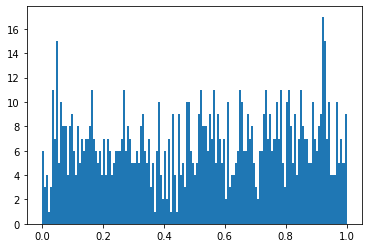

In [55]:
plt.hist(m, bins=150)

(array([437., 133.,  66.,  39.,  42.,  27.,  22.,  24.,  17.,   7.,  20.,
         10.,  10.,   9.,   9.,   5.,   7.,   6.,   5.,   9.,   9.,  14.,
          9.,   2.,   6.,   8.,   3.,   1.,   2.,   1.,   3.,   3.,   0.,
          4.,   4.,   2.,   3.,   1.,   1.,   3.,   1.,   3.,   1.,   2.,
          1.,   1.,   3.,   2.,   1.,   3.]),
 array([0.01001077, 0.04980721, 0.08960365, 0.12940009, 0.16919653,
        0.20899297, 0.24878941, 0.28858585, 0.32838229, 0.36817874,
        0.40797518, 0.44777162, 0.48756806, 0.5273645 , 0.56716094,
        0.60695738, 0.64675382, 0.68655026, 0.7263467 , 0.76614314,
        0.80593958, 0.84573602, 0.88553246, 0.9253289 , 0.96512534,
        1.00492179, 1.04471823, 1.08451467, 1.12431111, 1.16410755,
        1.20390399, 1.24370043, 1.28349687, 1.32329331, 1.36308975,
        1.40288619, 1.44268263, 1.48247907, 1.52227551, 1.56207195,
        1.60186839, 1.64166483, 1.68146128, 1.72125772, 1.76105416,
        1.8008506 , 1.84064704, 1.88044348, 1.

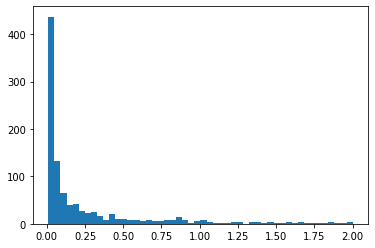

In [68]:
m=[]
fil2 = open('lenspos')
lc2 = fil2.readlines()
for l in lc2:
    s = l.split()
    m.append(float(s[2]))

plt.hist(m, bins=50)